 

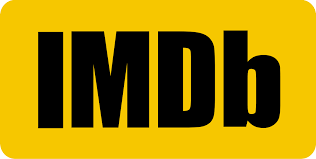 
# SENTIMENT ANALYSIS OF MOVIEW REVIEW From IMDB
## USING  Classical Machine Learning Models, Ensemble of Classical Machine Learning Models and DEEP NEURAL NETS

On a daily basis, billions of text data that express sentiment are
generated on the internet through social media and the entertainment industry.
Analyzing how a customer feels about a drama, tv series and movies are really
important to the entertainment industry. For instance, in case of movies, a movie
production company may need to know how customers feel about their movie. This
evaluation could be done through criteria such as was the movie good or bad, were
there parts of the movie that were good or bad, did the actors perform good or bad
and several other criteria. One way to evaluate these criteria would be through the
movie reviews left by customers. These reviews could be used to analyze the criteria
mentioned earlier. This analysis could be used to make changes in future movies
such as selecting an actor for a particular genre of movie, which part of movie should
be used for movie previews to attract people. This eventually will lead to increased
revenue for movie production companies. Thus the extreme need for Sentiment
analysis on movie review. The most popular platform today where people leave
movies reviews is IMDB. This project will analyze IMDB movie reviews and in a
broader sense will analyze whether a review for a movie is positive or negative. The
basic steps involve data mining and then training a machine learning model to
recognize whether a given movie’s review is positive or negative. Then the model
can predict whether a given review was positive or negative

## Task1: Load Data

In [31]:
import pandas as pd #for data container

In [32]:
raw_reviews_df = pd.read_csv("imdb_reviews.csv") #read from csv file

In [33]:
raw_reviews_df.shape #view dimensions of the pandas daframe

(50000, 2)

In [34]:
raw_reviews_df.iloc[0:1] #view one movie review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive


In [35]:
raw_reviews_df.info() #vew information abot Daframe in general

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


## Task2: Preprocess Data

In [36]:
from matplotlib import pyplot as plt#to plot histogram

Text(0, 0.5, 'Number of samples')

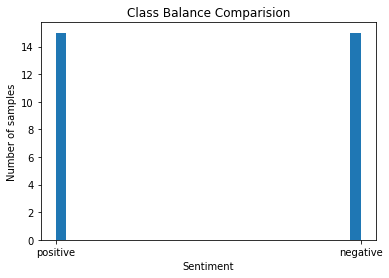

In [38]:
plt.hist(raw_reviews_df["sentiment"],density=True,bins=30)
plt.title("Class Balance Comparision")
plt.xlabel("Sentiment")
plt.ylabel("Number of samples")

In [39]:
print("Total Samples for Positive Sentiments: ",len(raw_reviews_df[raw_reviews_df["sentiment"]=="positive"]))
print("Total Samples for Negative Sentiments: ",len(raw_reviews_df[raw_reviews_df["sentiment"]=="negative"]))

Total Samples for Positive Sentiments:  25000
Total Samples for Negative Sentiments:  25000


In [40]:
print("Total Samples which do not have reviews: ",len(raw_reviews_df[raw_reviews_df["review"]==None]))

Total Samples which do not have reviews:  0


In [41]:
from wordcloud import WordCloud #library that allows word cloud to be generated

In [42]:
#convert the column specified by column_name in dataset_df(dataframe) to list
sentences_list = (raw_reviews_df[raw_reviews_df["sentiment"]=="negative"])["review"].tolist()

In [43]:
#convert a list to sentence
sentences_single_string = " ".join(sentences_list)

Text(0.5, 1.0, 'Negative Reviews')

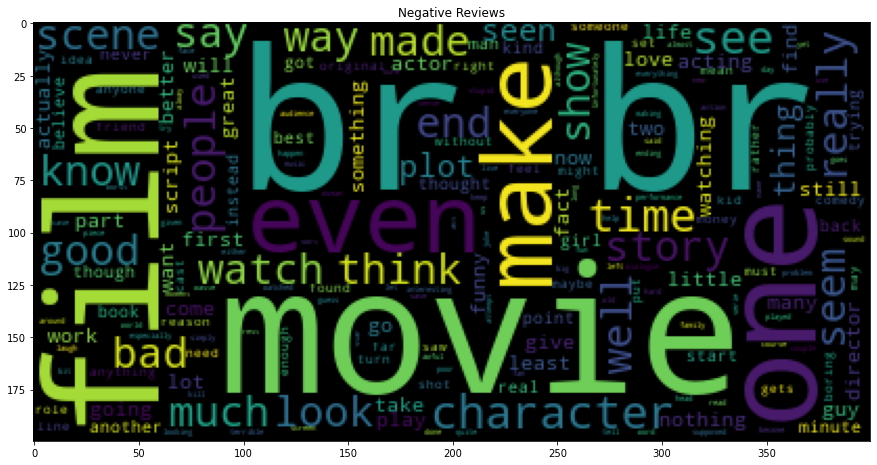

In [44]:
#plot word cloud
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(sentences_single_string))
plt.title("Negative Reviews")

In [14]:
#convert the column specified by column_name in dataset_df(dataframe) to list
sentences_list = (raw_reviews_df[raw_reviews_df["sentiment"]=="positive"])["review"].tolist()

In [46]:
#convert a list to sentence
sentences_single_string = " ".join(sentences_list)

Text(0.5, 1.0, 'Positive Reviews')

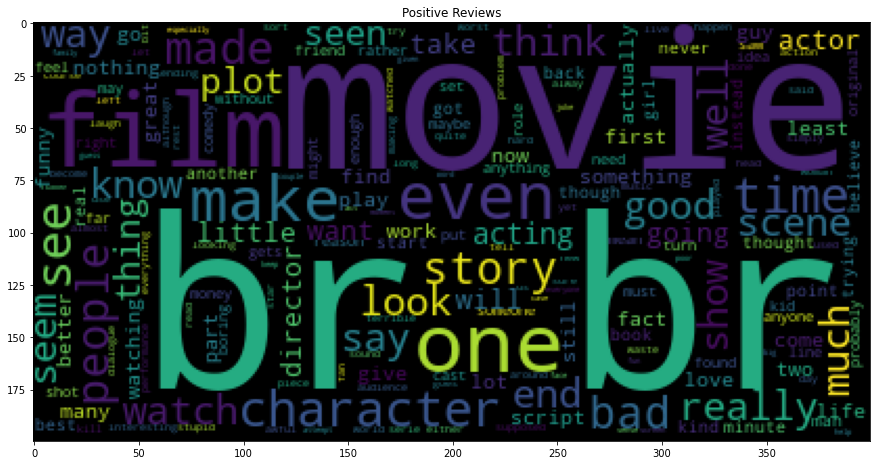

In [47]:
#plot word cloud
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(sentences_single_string))
plt.title("Positive Reviews")

In [38]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud #library that allows word cloud to be generated

def generate_word_cloud(dataframe_df,column_name,img_file=None,background_color="black",max_words=2000):
    """ This function generates word cloud
    
    Args:
        dataframe: the datafram object which contains column whose word cloud is to be generated
        column_name: the name of the column in dataframw whose cloud is to be generated
        
    Returns:
        None
    """
    #convert the column specified by column_name in dataset_df(dataframe) to list
    sentences_list = dataframe_df[column_name].tolist()
    
    #convert a list to sentence
    #sentences_single_string = " ".join(sentences_list)
    sentences_single_string = " ".join(map(str,sentences_list))
    
    #plot word cloud
    plt.figure(figsize=(15,15))
    
    img_mask = None
    
    if img_file != None:
        img_mask = np.array(Image.open(img_file))

    wc = WordCloud(mask=img_mask,
                   max_words=max_words,
                   background_color=background_color)        
        
    plt.imshow(wc.generate(sentences_single_string),interpolation="bilinear")
    plt.title("Word Cloud For " +  column_name)
    plt.show()

## Task3: Text Preprocessing

In part, text preprocessing tasks such as removing stopwords, punctuation is done

In [68]:
import string #lobrary that contains punctuation marks

string.punctuation #these punctuation will be remove from all movie reviews

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [69]:
a_review = raw_reviews_df["review"].iloc[0]
a_review

'one reviewers mentioned watching 1 oz episode youll hooked right exactly happened mebr br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordbr br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awaybr br would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannere

In [70]:
def remove_punctuation(text):
    """ This function removes punctuation marks from a given string
    
    Args:
        text: A string from where punctuation marks are to be removed if they exist
        
    Returns:
        punctuation_removed_text: A string from which punctuation mark is removed.
    """
    
    punctuation_removed_list = [char for char in text if char not in string.punctuation]
    
    punctuation_removed_text = "".join(punctuation_removed_list)
    
    return punctuation_removed_text

In [71]:
a_review = remove_punctuation(a_review)

In [72]:
a_review

'one reviewers mentioned watching 1 oz episode youll hooked right exactly happened mebr br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordbr br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awaybr br would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannere

In [73]:
import nltk #import natural laguage processing tooklikt which will give parameters for stopwords removal
nltk.download('stopwords') #download stopwords
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\achar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
#lets look what stopwords are in English Language
stop_words_list = stopwords.words('english')
print(stop_words_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [75]:
a_review

'one reviewers mentioned watching 1 oz episode youll hooked right exactly happened mebr br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordbr br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awaybr br would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannere

In [76]:
def remove_stop_words(text):
    """ This function removes stopwords from a given string.
    
    Args:
        text(string): The string from which stop words are to be removed.
        
    Returns:
        string: A string that is free of stop words
    """
    word_list = text.split(" ")
    word_list_new = [word.lower() for word in word_list if word.lower() not in stopwords.words("english")]
    word_string = " ".join(word_list_new)
    return word_string

In [77]:
a_review = remove_stop_words(a_review)

In [78]:
def remove_punctuation_and_stop_words(sentence):
    """This function removes clean a sentence removing punctation and stopwords
    Args:
        sentence(string): A string containing a sentence
    Return:
        cleaned_sentence(string): sentence free of stopwords and punctuation
    """
    #remove punctuation and characters made lower case, ends up being list of characters
    punctation_removed = [char.lower() for char in sentence if char not in string.punctuation]

    #join list of characters back to make a single string
    punctation_removed_join = "".join(punctation_removed)

    #remove stop words
    cleaned_sentence = [word for word in punctation_removed_join.split() if word not in stopwords.words("english")]

    cleaned_sentence_string = " ".join(cleaned_sentence)
    
    return cleaned_sentence_string

In [79]:
another_review = raw_reviews_df["review"].iloc[30000]
another_review

'one quite cartoon scooby doo films scooby doo loch ness monster turns entertaining exciting interesting funny also surprisingly good interpretation highlands scotland one annoying aspect film voices many characters american people trying sound scottish film unfortunately succeeding well although people better scottish accents othersbr br daphne come highlands see cousin shannon highland games blake castle gravely shannon tells gang believes seen loch ness monster yet chaos arises mystery inc gang another mystery handsbr br good scooby doo fans people want find scotland enjoy scooby doo loch ness monster'

In [80]:
another_review = remove_punctuation_and_stop_words(another_review)
another_review

'one quite cartoon scooby doo films scooby doo loch ness monster turns entertaining exciting interesting funny also surprisingly good interpretation highlands scotland one annoying aspect film voices many characters american people trying sound scottish film unfortunately succeeding well although people better scottish accents othersbr br daphne come highlands see cousin shannon highland games blake castle gravely shannon tells gang believes seen loch ness monster yet chaos arises mystery inc gang another mystery handsbr br good scooby doo fans people want find scotland enjoy scooby doo loch ness monster'

In [81]:
#remove punctuation and stopwords
#raw_reviews_df["review"] = raw_reviews_df["review"].apply(remove_punctuation_and_stop_words)

In [82]:
#save file to csv
#raw_reviews_df.to_csv("imdb_reviews_cleaned.csv")

In [83]:
raw_reviews_df = pd.read_csv("imdb_reviews_cleaned.csv")

In [84]:
raw_reviews_df["review"].iloc[30000]

'one quite cartoon scooby doo films scooby doo loch ness monster turns entertaining exciting interesting funny also surprisingly good interpretation highlands scotland one annoying aspect film voices many characters american people trying sound scottish film unfortunately succeeding well although people better scottish accents othersbr br daphne come highlands see cousin shannon highland games blake castle gravely shannon tells gang believes seen loch ness monster yet chaos arises mystery inc gang another mystery handsbr br good scooby doo fans people want find scotland enjoy scooby doo loch ness monster'

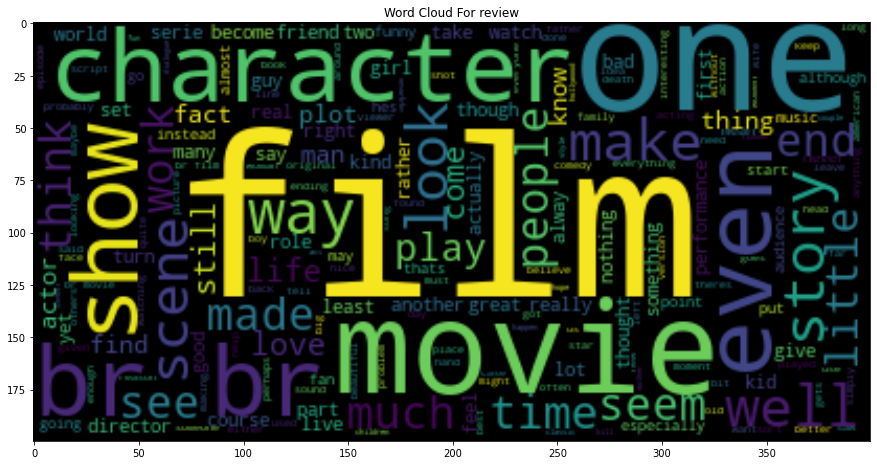

Wall time: 0 ns


In [85]:
#from collections import Counter
#generate_word_cloud(raw_reviews_df,"review",img_file="download.jpg")
generate_word_cloud(raw_reviews_df,"review",background_color="black")
%time

## Task 4: Generate Features from reviews And Numerical labels for Sentiment

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
vectorizer = TfidfVectorizer()

In [34]:
feature_matrix = vectorizer.fit_transform(raw_reviews_df["review"].tolist())

In [35]:
feature_matrix.shape

(50000, 180355)

In [36]:
#import label encoder
from sklearn import preprocessing

In [37]:
label_encoder = preprocessing.LabelEncoder()

In [38]:
labels = label_encoder.fit_transform(raw_reviews_df["sentiment"])

In [39]:
len(labels)

50000

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
feature_matrix_train, feature_matrix_test, labels_train, labels_test = train_test_split(feature_matrix, labels, test_size=0.2, random_state=0)

In [42]:
#labels_train = np.reshape(labels_train,(labels_train.shape[0],1))
#labels_test = np.reshape(labels_test,(labels_test.shape[0],1))


In [43]:
print("Features Train Shape: ", feature_matrix_train.shape)
print("Labels Train Shape: ", labels_train.shape)
print("")
print("Features Test Shape: ", feature_matrix_test.shape)
print("Labels Test Shape: ", labels_test.shape)

Features Train Shape:  (40000, 180355)
Labels Train Shape:  (40000,)

Features Test Shape:  (10000, 180355)
Labels Test Shape:  (10000,)


## Task 5: Train and Test Classical Machine Learning Models

In [44]:
#Train Naive Bayes Model
#More Details: https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(feature_matrix_train, labels_train)
y_pred_nb = model_nb.predict(feature_matrix_test)
accuracy_train_set = model_nb.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_nb.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("Naiive Bayes Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Naiive Bayes Model, Accuracy (Test Set) : ", accuracy_test_set)

Naiive Bayes Model, Accuracy (Train Set) :  0.919475
Naiive Bayes Model, Accuracy (Test Set) :  0.8534


In [45]:
#Train Descision Trees Model
#More Details: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree
from sklearn.tree import DecisionTreeClassifier
maximum_tree_depth= 50
model_dt = DecisionTreeClassifier(max_depth=maximum_tree_depth)
model_dt.fit(feature_matrix_train, labels_train)
y_pred_dt = model_nb.predict(feature_matrix_test)
accuracy_train_set = model_dt.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_dt.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("Descision Tree Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Descision Tree Model, Accuracy (Test Set) : ", accuracy_test_set)

Descision Tree Model, Accuracy (Train Set) :  0.9563
Descision Tree Model, Accuracy (Test Set) :  0.7335


In [46]:
#Train K Nearest Negihbor Model
#More Details: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
#MOre Details: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
number_of_neigbors = 5
minkowski_power = 2 # Manhattan Distance = 1, Euclidean Distance = 2
model_knn = KNeighborsClassifier(n_neighbors=number_of_neigbors, p =minkowski_power)
model_knn.fit(feature_matrix_train, labels_train)
y_pred_knn = model_nb.predict(feature_matrix_test)
accuracy_train_set = model_knn.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_knn.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("K Nearest Neighbors Model, Accuracy (Train Set) : ", accuracy_train_set)
print("K Nearest Neighbors Model, Accuracy (Test Set) : ", accuracy_test_set)

K Nearest Neighbors Model, Accuracy (Train Set) :  0.8596
K Nearest Neighbors Model, Accuracy (Test Set) :  0.7786


In [47]:
#Train Logistic Regression Model
#More Details: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression #import model for logistic regression
l2_norm = 0.8 # regularization parameter
l2_norm_inverse = 1/l2_norm 
maximum_iterations=4000 #maximum number of iterations
model_lr = LogisticRegression(C=l2_norm_inverse,max_iter=maximum_iterations) #create logistic regression model
model_lr.fit(feature_matrix_train, labels_train)
y_pred_lr = model_nb.predict(feature_matrix_test)
accuracy_train_set = model_lr.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_lr.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("Logistic Regression Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Logistic Regression Model, Accuracy (Test Set) : ", accuracy_test_set)

Logistic Regression Model, Accuracy (Train Set) :  0.9424
Logistic Regression Model, Accuracy (Test Set) :  0.8919


In [48]:
#Train Support Vector Machine Model
#More Details: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
from sklearn.svm import LinearSVC
l2_norm = 2
l2_norm_inverse = 1/l2_norm
maximum_iterations=4000 #maximum number of iterations
model_svm = LinearSVC(C=l2_norm_inverse,max_iter=maximum_iterations) #create support vector machine model
model_svm.fit(feature_matrix_train, labels_train)
y_pred_svm = model_nb.predict(feature_matrix_test)
accuracy_train_set = model_svm.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_svm.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("Support Vector Machine Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Support Vector Machine Model, Accuracy (Test Set) : ", accuracy_test_set)

Support Vector Machine Model, Accuracy (Train Set) :  0.980825
Support Vector Machine Model, Accuracy (Test Set) :  0.8967


<h3> Summary Of Classical Machine Learning Models </h3>
<br>

<table>
    <tr>
        <th>Model</th>
        <th>Accuracy on Train</th>
        <th>Accuracy on Test</th>
    </tr>
    <tr>
        <td>Naive Bayes</td>
        <td>0.919475</td>
        <td>0.8534</td>
    </tr>
    <tr>
        <td>Descision Trees</td>
        <td>0.9565</td>
        <td>0.7327</td>
    </tr>
    <tr>
        <td>K Nearest Neighbors</td>
        <td> 0.8596</td>
        <td>0.7786</td>
    </tr>    
    <tr>
        <td>Logistic Regression</td>
        <td>0.9424</td>
        <td>0.8919</td>
    </tr>    
    <tr>
        <td>Support Vector Machine</td>
        <td>0.980825</td>
        <td>0.8967</td>
    </tr>    
</table>

<br>
<p> From the table above, the maximum accuracy in around 0.9, which is descent but not great. It could be because of overfitting since the accuracy on train set is pretty high. Assuming overffitting and regularizing more, the accuray doesnt significalty go up. Using Enemble of these ML Model however could help increase accuracy lets explore that</P>

## Task 5: Train and Test  Ensemble of Classical Machine Learning Models
#### More Details: https://en.wikipedia.org/wiki/Ensemble_learning#Stacking
#### Mote Details: https://en.wikipedia.org/wiki/Boosting_(machine_learning)

In [49]:
#Create a stack of these estimators
estimators = [
    ("nb",model_nb), #stack naive bayes
    ("knn",model_knn), #stack K nearest neighor
    ('svm', model_svm) #stack support vector machine
]

#Train a stacked model
# Details: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
from sklearn.ensemble import StackingClassifier
model_stacked = StackingClassifier(estimators=estimators, final_estimator=model_lr) #use logisitc regression as the final estimator
model_stacked.fit(feature_matrix_train, labels_train)
y_pred_stacked = model_nb.predict(feature_matrix_test)
accuracy_train_set = model_stacked.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_stacked.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("Stacked ML Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Stacked ML Model, Accuracy (Test Set) : ", accuracy_test_set)

Stacked ML Model, Accuracy (Train Set) :  0.978525
Stacked ML Model, Accuracy (Test Set) :  0.9029


In [50]:
#Create Boosted Descision Trees
#More Details: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.ensemble import AdaBoostClassifier
model_boosted_dt = AdaBoostClassifier(n_estimators=10, random_state=0)
model_boosted_dt.fit(feature_matrix_train, labels_train)
y_pred_boosted = model_nb.predict(feature_matrix_test)
accuracy_train_set = model_boosted_dt.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_boosted_dt.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("Ada Boosted Descision Tree ML Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Ada Boosted Descision Tree ML Model, Accuracy (Test Set) : ", accuracy_test_set)

Ada Boosted Descision Tree ML Model, Accuracy (Train Set) :  0.72905
Ada Boosted Descision Tree ML Model, Accuracy (Test Set) :  0.716


<h3> Summary Of Ensemble of Classical Machine Learning Models </h3>
<br>

<table>
    <tr>
        <th>Model</th>
        <th>Accuracy on Train</th>
        <th>Accuracy on Test</th>
    </tr>
    <tr>
        <td>Stacking(NB, KNN, SVM, LR)</td>
        <td>0.978525</td>
        <td>0.9029</td>
    </tr>
    <tr>
        <td>Boosting(Descision Trees)</td>
        <td>0.72905</td>
        <td>0.72905</td>
    </tr>  
</table>

<br>
<p> From the table above, the maximum accuracy using Ensemble stacked ML Model has inreased by a small fraction, which does not exactly help the case.
    In the case of Boosted(Ada Boost) Descision Trees, the accuracy did not improve.
    Deep Neural Nets also knows as Deep Learning is widely used for Big Data, this could help increase accuracy lets explore that</P>

## Task 5: Train and Test Deep Neural Networks
#### More Details: https://en.wikipedia.org/wiki/Artificial_neural_networks
#### More Details: https://en.wikipedia.org/wiki/Deep_learning
#### More Details: https://www.tensorflow.org/tutorials/keras/text_classification

In [2]:
from tensorflow.keras.models import Sequential #stacked neural nets
from tensorflow.keras.layers import Dense #every neuron is connected toother
from tensorflow.keras.layers import Dropout #dropout regularization
from tensorflow.keras import regularizers #for l2 regualrization
from tensorflow.random import set_seed #random seed for droput
set_seed(0)

In [3]:
def get_sequential_dense_dropout_binary_nn_model(input_neurons=50,hidden_layer_neurons=[100,100,100],drop_out_rate=0.01):
    """ This function creates Sequential Neural Net with Dropout Regularization
    
    Args:
        input_neurons(int): Number of Input Neurons OR Number of Feautures per row of data that will be fed to nn
        hidden_layer(List[int]): A list containning number of Neurons per hidden layer. 
        drop_out_rate(float): The fraction for dropout probability
        
    Returns:
        nn_model: A neural net moddel based on tensorflow keras framework. 
    """
    nn_architechture = []
    
    #add hidden layers
    for i in range(0,len(hidden_layer_neurons)):
        if i == 0:
            nn_architechture.append(Dense(hidden_layer_neurons[i],
                                          activation="relu",
                                          input_shape=(input_neurons,)))
                                          #kernel_regularizer=regularizers.l2(0.001)))
            
            nn_architechture.append(Dropout(drop_out_rate))
        else:
            nn_architechture.append(Dense(hidden_layer_neurons[i],activation="relu"))
            nn_architechture.append(Dropout(drop_out_rate))
                                    
    #add output layer
    nn_architechture.append(Dense(1,activation="sigmoid"))
    
    #create model
    nn_model = Sequential(nn_architechture)
    
    #compile model
    
    nn_model.compile(
        optimizer = "adam", #adam optimizer
        loss = "binary_crossentropy", #logistic regression [y hat  - y]
        metrics = ["accuracy"]
    )
    
    nn_model.summary()
    
    return nn_model

In [53]:
#Create Neural Net Model
nn_model = get_sequential_dense_dropout_binary_nn_model(input_neurons=feature_matrix_train.shape[1],
                                                        hidden_layer_neurons=[100,100,100,100],
                                                        drop_out_rate=0.4)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               18035600  
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1

In [54]:
#Train Neural Net Model
nn_model.fit(feature_matrix_train,labels_train,epochs=2)

Epoch 1/2
1250/1250 [==============================] - 84s 67ms/step - loss: 0.3141 - accuracy: 0.8650
Epoch 2/2
1250/1250 [==============================] - 84s 67ms/step - loss: 0.1050 - accuracy: 0.9631


In [55]:
#evaluate Neural Net Model
loss, accuracy = nn_model.evaluate(feature_matrix_test,labels_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2858 - accuracy: 0.8893


In [56]:
y_pred_nn = model.predict(  ((feature_matrix_test) > 0.5).astype("int32"))

NameError: name 'model' is not defined

<p> Various Different hyperparameters such as increasing hidden layer, increasing number of hidden layer neurons, varying drop out regularization was applied. However this neural net approach did not increase accuracy.</p> 

## Task6: Plot Evaluation Metrics for all Models

In [ ]:
from sklearn.model_selection import train_test_split #split data into train,test sets
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve,  plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from matplotlib import pyplot as plt

In [ ]:
#make a list of classifers
ml_models_list = [model_nb, #Naive Bayes
                  model_dt, #Descision Trees
                 model_knn, #K nearest neighbors
                 model_lr, #Logistic Regression
                 model_svm, #Support Vector Machine
                 model_stacked, #Stacked Model: NB, SVM, KNN, LR
                 model_boosted_dt, #Ada Boosted Descision Tree
                 ]

In [ ]:
for model in ml_models_list:
    accuracy = model.score(feature_matrix_test,labels_test)  #get accuracy
    y_pred = model.predict(feature_matrix_test) #get predictions
    model_name = type(model).__name__
    print("Accuracy("+ model_name + "): ", accuracy.round(4)) #display accuracy
    print("Precision("+ model_name + "): ", precision_score(labels_test,y_pred).round(4)) #display precision
    print("Recall("+ model_name + "): ",recall_score(labels_test,y_pred).round(4)) #display recall
    print("\n")

In [ ]:
#Plot Confusion Matrix For all Models
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,10))

for model,ax in zip(ml_models_list, axes.flatten()):
    
    plot_confusion_matrix(model, 
                          feature_matrix_test, 
                          labels_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=["negative","positive"])
    
    ax.title.set_text(type(model).__name__)
plt.tight_layout()  

plt.show()

In [ ]:
#Plot ROC Curve For all Models
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

for model, ax in zip(ml_models_list,axes.flatten()):
    
    plot_roc_curve(model,feature_matrix_test,labels_test,ax=ax)
    
    ax.title.set_text(type(model).__name__)

plt.tight_layout()  

plt.show()

In [ ]:
#Plot Precision Recall CUrve FOr ALl Models
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

for model, ax in zip(ml_models_list,axes.flatten()):
    
    plot_precision_recall_curve(model,feature_matrix_test,labels_test,ax=ax)
    
    ax.title.set_text(type(model).__name__)

plt.tight_layout()  

plt.show()

### Task 7: Summarize Performace of Machine Learning Models

<table>
    <tr>
        <th>Model</th>
        <th>Accuracy on Train Set</th>
        <th>Accuracy on Test Set</th>
        <th>Precision on Test Set</th>
        <th>Recall on Test Set</th>
    </tr>
    <tr>
        <td>Naive Bayes</td>
        <td>0.919</td>
        <td>0.853</td>
        <td>0.873</td>
        <td>0.824</td>
    </tr>
    <tr>
        <td>Descision Trees</td>
        <td>0.956</td>
        <td>0.736</td>
        <td>0.725</td>
        <td>0.756</td>        
    </tr>
    <tr>
        <td>K Nearest Neighbors</td>
        <td>0.856</td>
        <td>0.779</td>
        <td>0.748</td>
        <td>0.835</td>        
    </tr> 
    <tr>
        <td>Logistic Regression</td>
        <td>0.942</td>
        <td>0.892</td>
        <td>0.884</td>
        <td>0.9</td>        
    </tr>    
    <tr>
        <td>Support Vector Machine</td>
        <td>0.981</td>
        <td>0.897</td>
        <td>0.891</td>
        <td>0.903</td>        
    </tr>
    <tr>
        <td>Stacking(NB, KNN, SVM, LR)</td>
        <td>0.978</td>
        <td>0.903</td>
        <td>0.901</td>
        <td>0.904</td>        
    </tr>
    <tr>
        <td>Boosting(Descision Trees)</td>
        <td>0.729</td>
        <td>0.716</td>
        <td>0.671</td>
        <td>0.839</td>        
    </tr> 
    <tr>
        <td>Deep Neural Net</td>
        <td>0.9613</td>
        <td>0.8912</td>
        <td>0.8534</td>
        <td>0.8534</td>        
    </tr>    
</table>  

<p> Depite using Deep Learning the accuracy didnt really go up. In fact, the result produced by stacking 
    Classical Machine Learning Models produced better result than deep learning. Lets explore further 
    text preprocessing methods in order to see if this accuarcy goes up. Moving forward, Descision Trees, K Nearest neigbors, and Boosted Descision tree model will not be used since the performace was below par for these models.</P>

### Task 8 (Modified Task 3): Text Preprocessing

In [24]:
import pandas as pd

In [25]:
#Re Read CSV files for raw reviews
raw_review_df = pd.read_csv("imdb_reviews.csv")

In [26]:
#Re Read CSV files for raw reviews
cleaned_review_df = pd.read_csv("imdb_reviews_cleaned.csv")

In [27]:
raw_review_df["review"].iloc[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [28]:
cleaned_review_df["review"].iloc[0]

'one reviewers mentioned watching 1 oz episode youll hooked right exactly happened mebr br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordbr br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awaybr br would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannere

<br/><p> In previous approach a simple removal of punctation marks and stopwords were done as part of text processing. This did remove some uncessary words however after closer analysis on the cleaned review, the characters in between html such as "br" still presist. Now lets take a little different approach to text preprocessing. </p>

<p> In this new approach text preprocessing the following procedure will be taken. 
<ul>
    <li>Eliminate any HTML tags, URLS using regulat expression</li>
    <li>Tokenize the string into words</li>
    <li>Remove stopword and punctuation Marks </li>
    <li>Perform Stemming https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html </li>
</ul>
</p>

In [29]:
#import required libraries
from nltk.corpus import stopwords #for stopwords
from nltk.stem import PorterStemmer #for word stemming
from nltk.tokenize import TweetTokenizer #for toekinizing string to list of words
import string #for punctuation
import re #for regular expression
import numpy as np

In [30]:
def process_string(text):
    """This function returns a processed list of words from the given text
    
    This function removes html elements and urls using regular expression, then
    converts string to list of workds, them find the stem of words in the list of words and
    finally removes stopwords and punctuation marks from list of words.
    
    Args:
        text(string): The text from which hrml elements, urls, stopwords, punctuation are removed and stemmed
        
    Returns:
        clean_text(string): A text formed after text preprocessing.
    """
    
    #remove any urls from the text
    text = re.sub(r"http:\/.*[\r\n]*","",text)
    
    #remove any html elements from the text
    text = re.sub(r"<[\w]*[\s]*/>","",text)
    
    #remove prediods  marks
    text = re.sub(r"[\.]*","",text)
    
    #initilze tweet tokenizer 
    tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
    
    #tokenize text
    text_tokens = tokenizer.tokenize(text)
    
    #intizlize porter stemmer
    porter_stemmer = PorterStemmer()
    
    #get english stopwords
    english_stopwords = stopwords.words("english")
    
    cleaned_text_tokens = [] # a list to hold cleaned text tokens
    
    for word in text_tokens:
        if((word not in english_stopwords) and #remove stopwords
            (word not in string.punctuation)): #remove punctuation marks
                
                stemmed_word = porter_stemmer.stem(word) #get stem of the current word
                cleaned_text_tokens.append(stemmed_word) #appened stemmed word to list of cleaned list
    
    #combine list into single string
    clean_text = " ".join(cleaned_text_tokens)
    
    return clean_text

In [31]:
raw_review_df["review"].iloc[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [32]:
pl = process_string(raw_review_df["review"].iloc[0])
pl

"one review mention watch 1 oz episod hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard who'll sold nickel inmat who'll kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort viewingtha

<h5>clearly this cleaned review is free of html tags as well now. Lets apply this new text cleaning method to all 50k reviews <h5/>

In [33]:
#raw_review_df["review"] = raw_review_df["review"].apply(process_string)

In [34]:
#save processed reviews for future use
#save file to csv
#raw_review_df.to_csv("imdb_reviews_cleaned_v2.csv")

In [35]:
raw_review_df = pd.read_csv("imdb_reviews_cleaned_v2.csv")

In [36]:
raw_review_df["review"].iloc[0]

"one review mention watch 1 oz episod hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard who'll sold nickel inmat who'll kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort viewingtha

<h5> Now that review have been saved and loaded. Lets see word cloud of these new processes reviews <h5/>

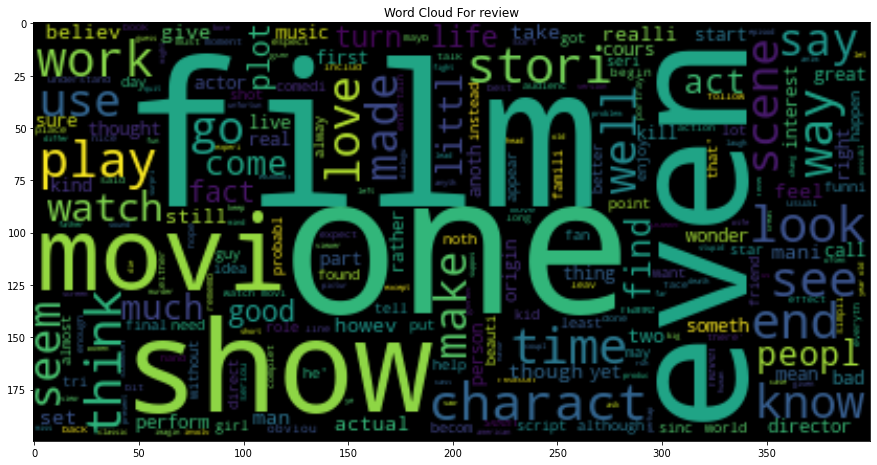

In [39]:
generate_word_cloud(raw_review_df,"review",background_color="black")

<h4> Clearly the new text preprocessing method resulted in much more cleaner reviews, the prominent "br" tag that has massive occurence is not visible anymore. Thanks to regular epression. Lets further examine these word could by looking into positive only and negative only reviews</h4>

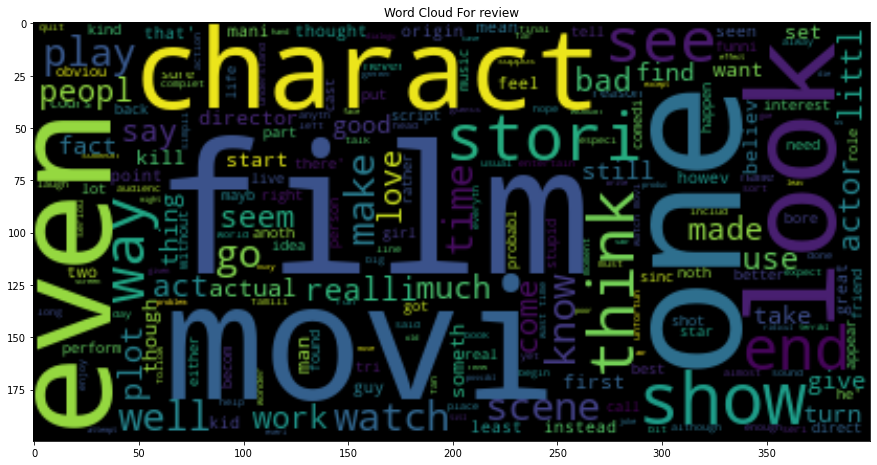

In [40]:
generate_word_cloud(raw_review_df[raw_review_df["sentiment"]=="negative"],"review",background_color="black")

<h5> The word cloud above is for moview review that were labelled as negative </h5>

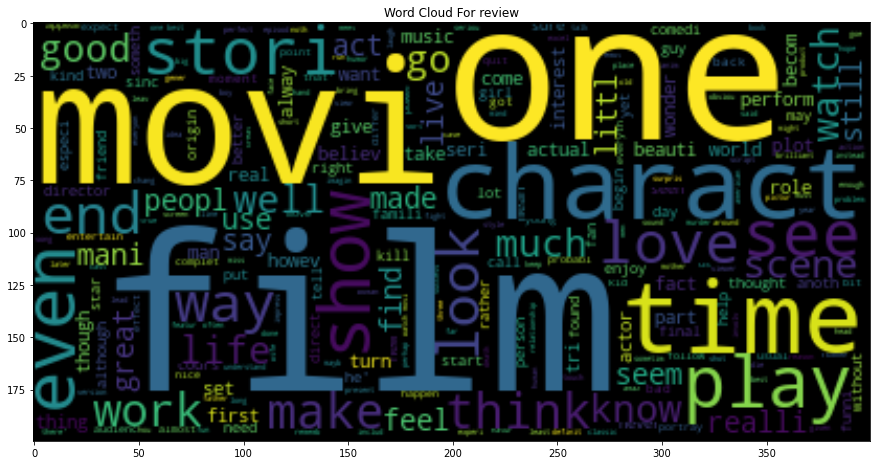

In [41]:
generate_word_cloud(raw_review_df[raw_review_df["sentiment"]=="positive"],"review",background_color="black")

<h5> The word cloud above is for moview review that were labelled as positive. Lets generate features </h5>

### Task 9 ( Modified Task 4): Generate Features from reviews And Numerical labels for Sentiment

<p> The clenaed reviews now have to be tokenized as a list of words rather than as series of sentences. </p>

In [42]:
def tokenize_text(text):
    """This function tokenizes sentences into list of words using nltk library.
    
    Args:
        text(string): A series of texts inside 
        
    Returns:
        text_tokens: A list of words
    """
    
    #initilze tweet tokenizer 
    tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
    
    #tokenize text
    text_tokens = tokenizer.tokenize(str(text))
    
    return text_tokens

<p> <h5> Lets Look at a review that isnt tokenized <h5/> <p/>

In [43]:
raw_review_df["review"].iloc[0]

"one review mention watch 1 oz episod hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard who'll sold nickel inmat who'll kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort viewingtha

<p> <h5> Lets tokenize this review <h5/> </p>

In [44]:
tokenize_text(raw_review_df["review"].iloc[0])

['one',
 'review',
 'mention',
 'watch',
 '1',
 'oz',
 'episod',
 'hook',
 'right',
 'exactli',
 'happen',
 'meth',
 'first',
 'thing',
 'struck',
 'oz',
 'brutal',
 'unflinch',
 'scene',
 'violenc',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'heart',
 'timid',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violenc',
 'hardcor',
 'classic',
 'use',
 'wordit',
 'call',
 'oz',
 'nicknam',
 'given',
 'oswald',
 'maximum',
 'secur',
 'state',
 'penitentari',
 'focus',
 'mainli',
 'emerald',
 'citi',
 'experiment',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inward',
 'privaci',
 'high',
 'agenda',
 'em',
 'citi',
 'home',
 'manyaryan',
 'muslim',
 'gangsta',
 'latino',
 'christian',
 'italian',
 'irish',
 'moreso',
 'scuffl',
 'death',
 'stare',
 'dodgi',
 'deal',
 'shadi',
 'agreement',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goe',
 'show',
 'dare',
 'forget',
 'pretti',
 'pictur',
 'p

<p> <h5> Now lets tokenize all 50k reviews </h5></p> 

In [45]:
raw_review_df["review"] = raw_review_df["review"].apply(tokenize_text)

In [46]:
raw_review_df["review"].iloc[25000]

['movi',
 'bad',
 'start',
 'purpos',
 'movi',
 'angela',
 'want',
 'get',
 'high',
 'bodi',
 'count',
 'act',
 'horribl',
 'kill',
 'act',
 'badli',
 'like',
 'alli',
 'got',
 'stuf',
 'toilet',
 'guess',
 'abandon',
 'cabin',
 'end',
 'movi',
 'come',
 'molli',
 'guy',
 'cabin',
 'see',
 'alli',
 'angela',
 'must',
 'gone',
 'get',
 'part',
 'realli',
 'got',
 'black',
 'girl',
 'angela',
 'cabin',
 'angela',
 'took',
 'guitar',
 'string',
 'chock',
 'one',
 'horribl',
 'act',
 'two',
 'turn',
 'around',
 'punch',
 'bitch',
 'molli',
 'get',
 'chase',
 'angela',
 'neigh',
 'turn',
 'around',
 'stab',
 'stupid',
 'movi',
 'suck']

In [47]:
raw_review_df["sentiment"].iloc[0:5]

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object

In [48]:
#import label encoder
from sklearn import preprocessing #library that alllows label encoding
label_encoder = preprocessing.LabelEncoder() #instantiate label encoder
raw_review_df["sentiment_encoded"] = label_encoder.fit_transform(raw_review_df["sentiment"]) #encode

In [49]:
raw_review_df[["sentiment","sentiment_encoded"]].iloc[0:5]

,sentiment,sentiment_encoded
0,positive,1
1,positive,1
2,positive,1
3,negative,0
4,positive,1


<p> The sentiments now have been encoded into numberical format, postive sentiments are encoded to 1 and negatives to 0 </p>

<p> <h4> Lets Do Some Feature Engineering </h4></p>

<p> First Lets Build Corupus of Word Counts, which has the number of times a word has 
appeared in the entire review given sentiment of the review. This corpus will be stored
as key:value format using python dictionary which are python's hashtables </p>
<h5> KEY = (WORD,SENTIMENT)  Value = Count ==>  dictionary[(WORD,SENTIMENT)] = Count </h5>

In [50]:
def build_frequency_corpus(sentiment_tokens_list,sentiment_labels):
    """This function build a frequency corpus given list of tokenize sentiment text and ther labels
    
    Args:
        sentiment_tokens_list(list[string]): A list containing string of sentiment tokesn, ex: [ ["asd","erter"], ["asdasd","ghgd"], ["asd"]]
        sentiment_labels(numpy.array): An array containig labels of sentiment ex: [1,0,1]
    """
    
    #convert numpy array to list
    labels_list = np.squeeze(sentiment_labels).tolist()
    
    corpus_frequency = {}
    for label, sentiment_tokens in zip(labels_list, sentiment_tokens_list):
        for word in sentiment_tokens:
            #make dictionary key value as a tuple made of word and label
            key_pair = (word,label)
            
            #if key_pair exits in corpus_frequency then simply increase the value by 1 
            # else assign a default value, using dictionary.get(key,default_value if key does not exist) + (update count)
            corpus_frequency[key_pair] = corpus_frequency.get(key_pair,0) + 1
            
    return corpus_frequency

In [51]:
test_list = [ ["hello","hi","bye"], ["greetings","hello","whatsup"], ["hey","sup","later"], ["hi","howslife","oi"]]

In [52]:
build_frequency_corpus(test_list,[1,0,1,1])

{('hello', 1): 1,
 ('hi', 1): 2,
 ('bye', 1): 1,
 ('greetings', 0): 1,
 ('hello', 0): 1,
 ('whatsup', 0): 1,
 ('hey', 1): 1,
 ('sup', 1): 1,
 ('later', 1): 1,
 ('howslife', 1): 1,
 ('oi', 1): 1}

<p> <h5> Looks like the corpus frequency function works as seen above, Now lets apply this to the token reviews </h5> </p>

In [53]:
review_corpus = build_frequency_corpus(raw_review_df["review"].tolist(),raw_review_df["sentiment_encoded"].to_numpy())

In [54]:
len(review_corpus)

204969

In [55]:
review_corpus

{('one', 1): 27078,
 ('review', 1): 1721,
 ('mention', 1): 1273,
 ('watch', 1): 12554,
 ('1', 1): 888,
 ('oz', 1): 178,
 ('episod', 1): 3049,
 ('hook', 1): 357,
 ('right', 1): 3469,
 ('exactli', 1): 913,
 ('happen', 1): 3088,
 ('meth', 1): 29,
 ('first', 1): 8897,
 ('thing', 1): 6892,
 ('struck', 1): 163,
 ('brutal', 1): 580,
 ('unflinch', 1): 26,
 ('scene', 1): 9755,
 ('violenc', 1): 1015,
 ('set', 1): 4014,
 ('word', 1): 1669,
 ('go', 1): 8072,
 ('trust', 1): 375,
 ('show', 1): 10861,
 ('faint', 1): 59,
 ('heart', 1): 1793,
 ('timid', 1): 33,
 ('pull', 1): 953,
 ('punch', 1): 248,
 ('regard', 1): 515,
 ('drug', 1): 847,
 ('sex', 1): 1300,
 ('hardcor', 1): 99,
 ('classic', 1): 2710,
 ('use', 1): 4877,
 ('wordit', 1): 1,
 ('call', 1): 2314,
 ('nicknam', 1): 49,
 ('given', 1): 1627,
 ('oswald', 1): 25,
 ('maximum', 1): 47,
 ('secur', 1): 211,
 ('state', 1): 1064,
 ('penitentari', 1): 2,
 ('focus', 1): 557,
 ('mainli', 1): 414,
 ('emerald', 1): 10,
 ('citi', 1): 1520,
 ('experiment', 1):

<p> <h5> CLearly Lots of words.  </h5> </p>

<p><h4> 
Now Time for some feature engineering. <br/>
    Now the feature matrix for every review would look like: <br/>
    [Bias Term, Count of Words for Postive sentiment , Count of Words for Negative sentiment] ==> [bias, +count, -count] </h4>
    where,
    Bias Term = 1 <br/>
    Count Of Word for Postive Sentiment = The total count of words that appear in the reviews that were labelled having positive sentiment </br>
    Count of Words for Negative sentiment = The total count of words that appear in the reviews that were labelled having negative sentiment </br>
    for both counts, the frequency is fetched from the frequency corpus above.
    for example:<br/>
    assume the frequency corpus:<br/>
    ("good",1):4 <br/>
    ("bad",1):2 <br/>
    ("awesome",1):2 <br/>
    ("aweful",1):4 <br/>
    ("nice",1):2 <br/>
    assume the following review <br/>
    ["good awesome nice"]-sentiment=1(postive): THe word vector would be [1, 4(good)+2(awesome)+2(nice), 0] ==> [1,8,0]<br/>
    ["nice aweful bad"] -sentiment=0(negative): THe word vector would be [1, 2(nice),4(aweful)+2(bad)] ==> [1,2,6] <br/>
</h4>     
</p>


In [56]:
def extract_features(sentiment_tokens,sentiment_corpus_frequency):
    """This function build a frequency corpus given list of tokenize sentiment text and ther labels
    
    Args:
        sentiment_tokens(list[string]): A list containing string of sentiment tokesn, ex: [ ["asd","erter"], ["asdasd","ghgd"], ["asd"]]
        sentiment_corpus_frequency(dictionary[(word,label)]=value): An dictionary containing word frequency
        
    Returns:
        feature_matrix[numpy.array]: A numpy array of dim (1,3) contaning [1,+count,-count]
    """
    
    #declare feature matrix
    feature_matrix = np.zeros((1,3))
    
    #loop through the list of tokens for a given sentiment text
    for word in sentiment_tokens:
        
        #if the word,+velabel => (word,1) is in sentiment_corpus_frequency then increment by the frequency else increment by 0
        feature_matrix[0,1] += sentiment_corpus_frequency.get((word,1),0)
        
        #if the word,-velabel => (word,0) is in sentiment_corpus_frequency then increment by the frequency else increment by 0
        feature_matrix[0,2] += sentiment_corpus_frequency.get((word,0),0)
        
    #add the bias term
    feature_matrix[0,0] = 1
        
    return feature_matrix

In [57]:
extract_features(raw_review_df["review"].iloc[0],review_corpus)

array([[1.00000e+00, 3.64515e+05, 3.70246e+05]])

<p> <h5> Clearly The feature extraction process is working, Now time to apply this to enitre 50k reviews </h5></p>

In [58]:
#declare a feature matrix of shape [50k,3]
feature_matrix = np.zeros((len(raw_review_df),3))
feature_matrix.shape

(50000, 3)

In [59]:
#extract features for all 50k reviews
#for i in range(0,len(raw_review_df)):
    #feature_matrix[i,:] = extract_features(raw_review_df["review"].iloc[i],review_corpus)

In [60]:
#feature_matrix[0]

In [61]:
#add the feature matrix to dataframe so that it can be saved as load easily for future
#raw_review_df[["Bias","Positive_Count","Negative_Count"]] = feature_matrix 

In [62]:
raw_review_df.iloc[0]

Unnamed: 0                                                           0
review               [one, review, mention, watch, 1, oz, episod, h...
sentiment                                                     positive
sentiment_encoded                                                    1
Name: 0, dtype: object

<p> <h5> Now the feature matrix is available and it is stored in dataframe, Lets save this feature matrix so for future it can be directly loadedfor speedup </h5> </p>

In [63]:
#save to csv
#raw_review_df.to_csv("imdb_reviews_cleaned_features_v3.csv") uncomment if this hasnt been done already

In [64]:
#load the csv now
raw_review_df = pd.read_csv("imdb_reviews_cleaned_features_v3.csv")

In [65]:
#shuffle data
raw_review_df = raw_review_df.sample(frac=1)

In [66]:
raw_review_df.iloc[0:3]

,Unnamed: 0,Unnamed: 0.1,review,sentiment,sentiment_encoded,Bias,Positive_Count,Negative_Count
14940,14940,14940,"['mate', 'suggest', 'check', 'rise', 'footsold...",negative,0,1.0,509800.0,459812.0
24016,24016,24016,"['one', 'word', 'describ', 'film', 'bad', 'ide...",negative,0,1.0,380471.0,398789.0
38044,38044,38044,"['mani', 'sourc', 'routin', 'lump', 'thought-p...",positive,1,1.0,652978.0,609924.0


<p> <h5> Now that data has been preprocessed lets sperate feauture matrix and feature labels inroder to make then ready for trainning ML Models</h5> </p>

In [67]:
#get features
features_matrix= raw_review_df[["Bias","Positive_Count","Negative_Count"]].to_numpy().copy()

In [68]:
#verify legngth
features_matrix.shape

(50000, 3)

In [69]:
#verify data
features_matrix[0:3]

array([[1.00000e+00, 5.09800e+05, 4.59812e+05],
       [1.00000e+00, 3.80471e+05, 3.98789e+05],
       [1.00000e+00, 6.52978e+05, 6.09924e+05]])

In [70]:
#get feature labels 
labels = raw_review_df["sentiment_encoded"].to_numpy().copy()

In [71]:
#verify shape
labels.shape

(50000,)

In [72]:
#verify  data
labels[0:3]

array([0, 0, 1], dtype=int64)

<p> <h5> Now that Feautre matrix and label matrix are availabe time to sperate them for training and testing </h5> </p>

In [73]:
from sklearn.model_selection import train_test_split #module that allows 

In [74]:
feature_matrix_train, feature_matrix_test, labels_train, labels_test = train_test_split(features_matrix, labels, test_size=0.2, random_state=0)

### Task 10 (Redo of Task 5): Train and Test Classical Machine Learning Models

In [75]:
#Train Naive Bayes Model
#More Details: https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(feature_matrix_train, labels_train)
y_pred_nb = model_nb.predict(feature_matrix_test)
accuracy_train_set = model_nb.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_nb.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("Naiive Bayes Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Naiive Bayes Model, Accuracy (Test Set) : ", accuracy_test_set)

Naiive Bayes Model, Accuracy (Train Set) :  0.500075
Naiive Bayes Model, Accuracy (Test Set) :  0.4997


In [76]:
#Train Logistic Regression Model
#More Details: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression #import model for logistic regression
l2_norm = 0.8 # regularization parameter
l2_norm_inverse = 1/l2_norm 
maximum_iterations=2000000 #maximum number of iterations
model_lr = LogisticRegression(C=l2_norm_inverse,max_iter=maximum_iterations) #create logistic regression model
model_lr.fit(feature_matrix_train, labels_train)
y_pred_lr = model_nb.predict(feature_matrix_test)
accuracy_train_set = model_lr.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_lr.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("Logistic Regression Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Logistic Regression Model, Accuracy (Test Set) : ", accuracy_test_set)

Logistic Regression Model, Accuracy (Train Set) :  0.688775
Logistic Regression Model, Accuracy (Test Set) :  0.691


In [77]:
#Train Support Vector Machine Model
#More Details: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
from sklearn.svm import LinearSVC
l2_norm = 2
l2_norm_inverse = 1/l2_norm
maximum_iterations=4000 #maximum number of iterations
model_svm = LinearSVC(C=l2_norm_inverse,max_iter=maximum_iterations) #create support vector machine model
model_svm.fit(feature_matrix_train, labels_train)
y_pred_svm = model_nb.predict(feature_matrix_test)
accuracy_train_set = model_svm.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_svm.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("Support Vector Machine Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Support Vector Machine Model, Accuracy (Test Set) : ", accuracy_test_set)

Support Vector Machine Model, Accuracy (Train Set) :  0.6099
Support Vector Machine Model, Accuracy (Test Set) :  0.6084


D:\ProgramFiles\anaconda3\envs\asl_venv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [78]:
#Create Neural Net Model
nn_model = get_sequential_dense_dropout_binary_nn_model(input_neurons=feature_matrix_train.shape[1],
                                                        hidden_layer_neurons=[100,100,100,100],
                                                        drop_out_rate=0.4)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1

#Train Neural Net Model
nn_model.fit(feature_matrix_train,labels_train,epochs=5)

In [87]:
#evaluate Neural Net Model
loss, accuracy = nn_model.evaluate(feature_matrix_test,labels_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5027


### Task 11 (Feautre Generation): TF-IDF

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [82]:
vectorizer = TfidfVectorizer()

In [83]:
feature_matrix = vectorizer.fit_transform(raw_review_df["review"].tolist())

In [84]:
feature_matrix.shape

(50000, 135636)

In [85]:
#get feature labels 
labels = raw_review_df["sentiment_encoded"].to_numpy().copy()

In [86]:
labels.shape

(50000,)

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
feature_matrix_train, feature_matrix_test, labels_train, labels_test = train_test_split(feature_matrix, labels, test_size=0.2, random_state=0)

In [89]:
#Train Naive Bayes Model
#More Details: https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(feature_matrix_train, labels_train)
y_pred_nb = model_nb.predict(feature_matrix_test)
accuracy_train_set = model_nb.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_nb.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("Naiive Bayes Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Naiive Bayes Model, Accuracy (Test Set) : ", accuracy_test_set)

Naiive Bayes Model, Accuracy (Train Set) :  0.9019
Naiive Bayes Model, Accuracy (Test Set) :  0.8494


In [90]:
#Train Logistic Regression Model
#More Details: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression #import model for logistic regression
l2_norm = 0.8 # regularization parameter
l2_norm_inverse = 1/l2_norm 
maximum_iterations=4000 #maximum number of iterations
model_lr = LogisticRegression(C=l2_norm_inverse,max_iter=maximum_iterations) #create logistic regression model
model_lr.fit(feature_matrix_train, labels_train)
y_pred_lr = model_nb.predict(feature_matrix_test)
accuracy_train_set = model_lr.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_lr.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("Logistic Regression Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Logistic Regression Model, Accuracy (Test Set) : ", accuracy_test_set)

Logistic Regression Model, Accuracy (Train Set) :  0.932725
Logistic Regression Model, Accuracy (Test Set) :  0.8872


In [91]:
#Train Support Vector Machine Model
#More Details: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
from sklearn.svm import LinearSVC
l2_norm = 2
l2_norm_inverse = 1/l2_norm
maximum_iterations=4000 #maximum number of iterations
model_svm = LinearSVC(C=l2_norm_inverse,max_iter=maximum_iterations) #create support vector machine model
model_svm.fit(feature_matrix_train, labels_train)
y_pred_svm = model_nb.predict(feature_matrix_test)
accuracy_train_set = model_svm.score(feature_matrix_train,labels_train)  #get accuracy on train set
accuracy_test_set = model_svm.score(feature_matrix_test,labels_test)  #get accuracy on test set
print("Support Vector Machine Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Support Vector Machine Model, Accuracy (Test Set) : ", accuracy_test_set)

Support Vector Machine Model, Accuracy (Train Set) :  0.969375
Support Vector Machine Model, Accuracy (Test Set) :  0.8906
